# Exercise Session 4: K-means Clustering

In this exercise we will work on K-means clustering. You will be asked to cluster the MNIST dataset using the k-means algorithm. 

Let's get started!

In [21]:
import random
from json import loads
import numpy as np
import matplotlib.pyplot as plt
# set matplotlib to display all plots inline with the notebook
%matplotlib inline

## Helper functions we use to load the data and visualize the images

In [22]:
def display_digit(image, label, training_or_inferred = "training"):
    """ 
    graphically display a 784x1 vector, representing a digit, and show the corresponding label
    
    """
 
    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    if training_or_inferred == "training":
        title_str = "GT label: "
    else:
        title_str = "Inferred label: "
    plt.title(title_str  + str(int(label)))
    
def display_vector(vector):
    """ 
    graphically display a 784x1 vector, representing a digit, without showing the label
    
    """
 
    plt.figure()
    fig = plt.imshow(vector.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
       

## 1 Dataset

### Load and Visualize dataset

The MNIST database contains a total of 70,000 handwritten digits with 10 different classes, from 0 to 9. 60,000 examples are taken as training dataset and the remaining 10,000 as test set. The digits have been size-normalized and centered in a fixed-size image. 

First download MNIST from: https://www.python-course.eu/data/mnist/mnist_train.csv
and put this csv file in the same folder as your jupyter notebook file. (You may have already done this in a previous exercise, it is fine to reuse the same csv file)

Each image is of size 784 with integers in the range $[0, 255]$, and the images can be reshaped to $28 \times 28$. The value of the pixels indicate the brightness of a pixel, that is, the higher number the brighter the pixel.

To make sure everything went fine, we will first load the dataset and visualize some samples from it. It might take a while to load it into memory! We will then subsample the dataset. The MNIST database is huge, and our algorithm will take very long if we want to use all the data. Therefore we will only use the first 1200 samples as our training dataset.


In [23]:
# load the dataset
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

train_data = np.loadtxt("mnist_train.csv", delimiter=",")

In [24]:
x_train = np.asfarray(train_data[:1200, 1:])
y_train = np.asfarray(train_data[:1200, 0])

print(x_train.shape)

(1200, 784)


### Image Visualization

We can use the help function 'display_digit' to display the image of each data sample.

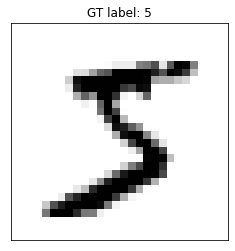

In [25]:
# display the first training sample
display_digit(x_train[0,:], y_train[0], "training")

# 2 K-means Clustering

In this section we will learn how to implement the k-means algorithm. The procedure is quite simple:

1. Initialize the cluster centers (randomly in our case, but there are more clever methods for initialization out there!)
2. Loop until the cluster centers don't move anymore or we reach the max number of iterations:
    1. Find the distance of each point to the cluster centers.
    2. Assign each data point to the closest cluster center.
    3. Update the cluster centers as the mean of the data points assigned to that cluster.
    
 

First we will initialize K cluster centers randomly. Pick K values randomly from the given dataset as initial cluster centers and return them.

In [26]:
def init_centers(data, K):
    """
    Randomly pick K data from the input data as starting points for centers.
    
    input: 
        data: ndarray of shape (N, d) where N is the number of pixels, d is number of features.
        K: int, the number of clusters.
    output:
        center: ndarray of shape (K, d). Initial cluster centers.
    
    """    
    np.random.seed(0)
    random_idx = np.random.permutation(data.shape[0])
    # select the first K random index and use these index to select centers from data
    center = data[random_idx[:K]]
       
    return center

Let's use this function to first initialize 10 cluster centers and then visualize them.

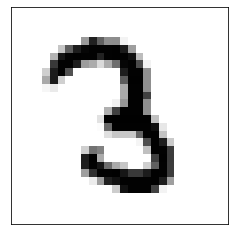

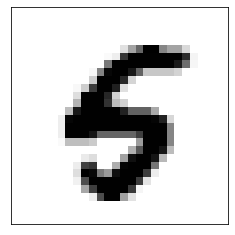

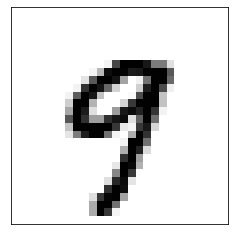

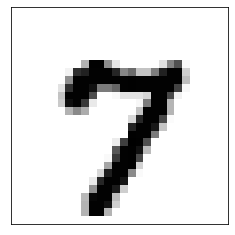

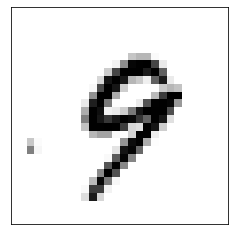

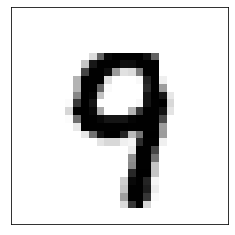

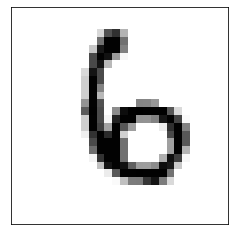

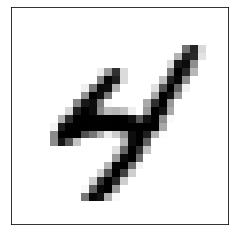

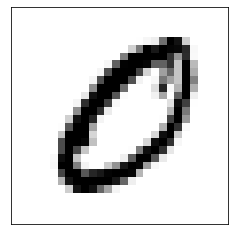

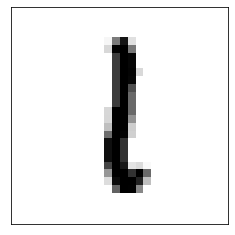

In [28]:
# test code for init_centers, define the number of clusters (for example, 10)
# and dispaly the initial centers
original_centers = init_centers(x_train,10)
for center in original_centers:
    display_vector(center)

Now let us implement some essential components of the k-means algorithm: a function to compute the distance of each data point to the cluster centers and a function to assign each data point to the closest cluster center.

In [8]:
 def compute_distance(data, centers, K):
    """
    Compute the euclidean distance between each datapoint and each center.
    
    input:    
        data: ndarray of shape (N, d) where N is the number of data points, d is the number of features (:=pixels).
        centers: ndarray of shape (K, d). Centers of K clusters.
        K: number of clusters.
        
    output:
        distance: ndarray of shape (N, K).
    """
    distance = np.zeros((data.shape[0], K))
    for k in range(K):
        # compute the euclidean distance for each data to each center
        center_k = centers[k, :]
        l2distance_k = np.sqrt(((data - center_k)**2).sum(axis=1))
        distance[:, k] = l2distance_k
        
    return distance

In [11]:
def find_closest_cluster(distance):
    """
    Assign datapoints to clusters according to minimum input distance.
    
    input:
        distance: ndarray of shape (N, K). the distance of each data point to each cluster center.

    output:
        cluster_assignments: ndarray of shape (N,) cluster assignment of each datapoint.
    """
    cluster_assignments = np.argmin(distance, axis=1)
    return cluster_assignments

Let's check the results after building clusters based on the initial cluster centers.

In [12]:
distance = compute_distance(x_train, original_centers, 10)
cluster_assignments = find_closest_cluster(distance)

# the number of clusters should be the same as the number of centers, which is 10 here
print ('the number of clusters are: ',len(original_centers))
for i in np.arange(no_of_different_labels):
    print ('the number of data points assigned to the %d cluster is %d'%(i+1,np.sum(cluster_assignments==i)))

the number of clusters are:  10
the number of data points assigned to the 1 cluster is 62
the number of data points assigned to the 2 cluster is 90
the number of data points assigned to the 3 cluster is 104
the number of data points assigned to the 4 cluster is 80
the number of data points assigned to the 5 cluster is 228
the number of data points assigned to the 6 cluster is 97
the number of data points assigned to the 7 cluster is 67
the number of data points assigned to the 8 cluster is 89
the number of data points assigned to the 9 cluster is 115
the number of data points assigned to the 10 cluster is 268


And now we need to update the cluster centers as the mean of the data points assigned to each cluster.

In [13]:
def compute_centers(data, cluster_assignments, K):
    """
    compute the center of each cluster

    input: 
        data: input data, shape is (N,d) where N is the number of samples, d is number of features
        cluster_assignments: the assigned cluster of each data sample, shape is (N,)
        K: the number of clusters

    output:
        centers: the new centers of each cluster, shape is (K,d) where K is the number of clusters 
        and d is the number of features 
    """
    centers = np.zeros((K, data.shape[1]))
    for k in range(K):
        centers[k, :] = np.mean(data[cluster_assignments == k], axis=0)
    return centers

In [14]:
new_centers = compute_centers(x_train, cluster_assignments, 10)

K-means is an iteration of first finding cluster centers, then building new clusters. We iterate between these two steps until we converge. You can say that the algorithm has converged when the cluster centers do not move anymore. Fill in the function below to perform this iteration.  



In [15]:
def k_means(data, K, max_iter):
    """
    Main function that combines all the former functions together to build the K-means algorithm.
    
    Input: 
        data: ndarray of shape (N, d) where N is the number of pixels, d is number of features.
        K: int, the number of clusters.
        max_iter: int, the maximum number of iterations
    
    output:
        centers: ndarray of shape (K, d). Final cluster centers.
        cluster_assignments: ndarray of shape (N,) index of assigned cluster for each data point.
    """
    centers = init_centers(data, K)
    for i in range(max_iter):
        old_centers = centers.copy()
        distance = compute_distance(data, old_centers, K)
        cluster_assignments = find_closest_cluster(distance)
        centers = compute_centers(data, cluster_assignments, K)
        # End of the algorithm if the centers have not moved
        if np.all(old_centers == centers):
            break
    return centers, cluster_assignments

In [16]:
final_centers, cluster_assignments = k_means(x_train, 10, 1000)

Each data point now has a cluster assignment from "0,..,9". However, these numbers do not really reflect the label of the cluster (because they are shuffled). For example an image may belong to the 0th cluster, but this does not mean the image depicts 0. But we have access to the true label of each data point in y_label. Let us now make use of these.

If we want to assign the true label to each cluster after k-means, we can do so via voting. We have now assigned to each cluster some data samples. The label of the cluster will be assigned as the most common label among these data samples (the mode). Each data point within the cluster will take the label of the cluster.

In [17]:
from scipy.stats import mode

def assign_labels_to_centers(data, cluster_assignments, true_labels, centers):
    """
    Input: 
        data: ndarray of shape (N, d) where N is the number of samples, d is number of features.
        cluster_assignments: ndarray of shape (N,) assigned cluster index for each data point.
        true_labels: ndarray of shape (N,), training labels from the dataset
        centers: ndarray of shape (N, d). Final cluster centers.
        
    Returns: 
        new_labels: ndarray of shape (N,). The labels assigned to each data point after clustering, via k-means.
        cluster_center_label: ndarray of shape (K,). The labels of the cluster centers
    """
    new_labels = np.zeros(data.shape[0],)
    cluster_center_label = np.zeros(centers.shape[0])
    for i in range(len(centers)):
        mode_res = mode(true_labels[cluster_assignments==i])[0][0]
        cluster_center_label[i] = mode_res
        new_labels[cluster_assignments==i] = cluster_center_label[i]
    return new_labels, cluster_center_label

Now that we have assigned labels to our data points, we can check for accuracy.

In [18]:
def accuracy_fn(pred_labels, gt_labels):
    return 100 * np.mean(pred_labels == gt_labels)

Let's run and test!

In [19]:
final_centers, cluster_assignments = k_means(x_train, 10, 1000)
pred_labels, cluster_center_label = assign_labels_to_centers(x_train, cluster_assignments, y_train, final_centers)
print("Accuracy is", accuracy_fn(pred_labels, y_train))

Accuracy is 56.00000000000001


#### Visualize the data with their predicted labels.

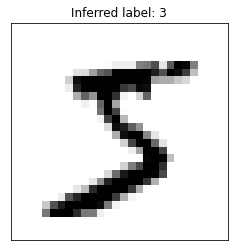

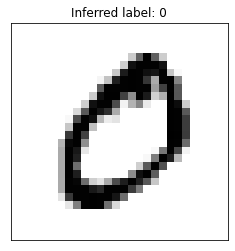

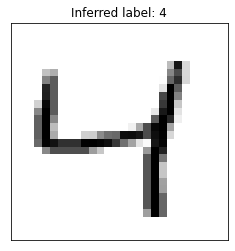

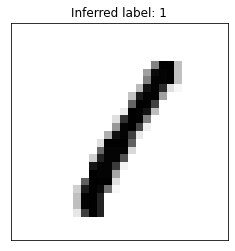

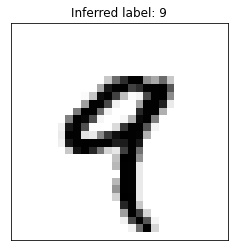

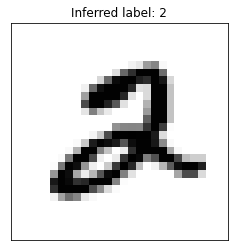

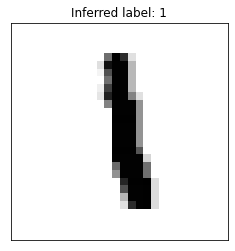

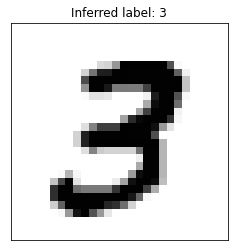

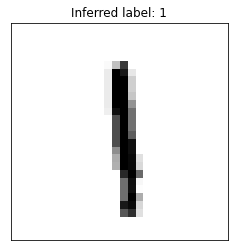

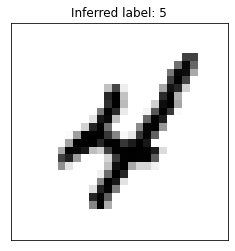

In [20]:
for i,x in enumerate(x_train[:10,:]):
    display_digit(x, pred_labels[i], "inferred")

#### Visualize the cluster centers

In [ ]:
for i, center in enumerate(final_centers):
    display_digit(center, cluster_center_label[i], "inferred")